#3η Σειρά Ασκήσεων - Ομάδα 65
> Αριστείδης Βασιλάκης 03116142

> Δημήτριος Μυλωνάκης 03115742

> Ευγκένι Δούφας 03115728


# Προετοιμασία των προγραμματιστικών εργαλείων και των Dataset με βάση την εκφώνηση

Στο τέλος θα υπάρχουν τα δείγματα εκπαίδευσης 'x_train_ds' με τις ετικέτες τους 'y_train_ds' και τα δείγματα δοκιμής του μοντέλου 'x_test_ds' και 'y_train_ds'.

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.datasets import cifar100

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)

# select a url for a unique subset of CIFAR-100 with 20, 40, 60, or 80 classes
def select_classes_number(classes_number = 20):
  cifar100_20_classes_url = "https://pastebin.com/raw/nzE1n98V"
  cifar100_40_classes_url = "https://pastebin.com/raw/zGX4mCNP"
  cifar100_60_classes_url = "https://pastebin.com/raw/nsDTd3Qn"
  cifar100_80_classes_url = "https://pastebin.com/raw/SNbXz700"
  if classes_number == 20:
    return cifar100_20_classes_url
  elif classes_number == 40:
    return cifar100_40_classes_url
  elif classes_number == 60:
    return cifar100_60_classes_url
  elif classes_number == 80:
    return cifar100_80_classes_url
  else:
    return -1

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
# load the entire dataset
(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 2s 0us/step


In [6]:
print(x_train_all.shape)
team_seed = 65
# select the number of classes 20, 40,60,80
cifar100_classes_url = select_classes_number(80)

(50000, 32, 32, 3)


In [7]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))
print("x_train now:", x_train_ds.shape, "y_train : ", y_train_ds.shape)

x_train now: (40000, 32, 32, 3) y_train :  (40000, 1)


In [8]:
# print our classes
print(our_classes)
CLASSES_NUM=len(our_classes)
CLASSES_NUM

['apple', ' aquarium_fish', ' baby', ' bear', ' beaver', ' bee', ' bicycle', ' bottle', ' bowl', ' boy', ' bridge', ' butterfly', ' can', ' castle', ' caterpillar', ' cattle', ' chair', ' chimpanzee', ' clock', ' cloud', ' cockroach', ' couch', ' crab', ' crocodile', ' cup', ' dinosaur', ' dolphin', ' elephant', ' flatfish', ' girl', ' hamster', ' kangaroo', ' lamp', ' lawn_mower', ' leopard', ' lion', ' lizard', ' lobster', ' maple_tree', ' motorcycle', ' mountain', ' mouse', ' mushroom', ' oak_tree', ' orchid', ' otter', ' pear', ' pickup_truck', ' plain', ' plate', ' porcupine', ' possum', ' rabbit', ' ray', ' road', ' rocket', ' seal', ' shark', ' shrew', ' skyscraper', ' snail', ' snake', ' spider', ' squirrel', ' streetcar', ' sunflower', ' sweet_pepper', ' table', ' tank', ' telephone', ' television', ' tiger', ' tractor', ' turtle', ' wardrobe', ' whale', ' willow_tree', ' wolf', ' woman', ' worm']


80

# Μετρικές απόδοσης

Για τα μοντέλα που θα δημιουργήθηκαν θα παρουσιάζονται οι γραφικές παραστάσεις των cross entropy loss και του classification accurracy ανα epoch για τα σύνολα train και validation.

Eπίσης θα παρουσιάζονται για τα δεδομένα test μετά την εκπαίδευση το accuracy και το cross entropy loss.

In [9]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	plt.figure(figsize=(8, 8))
	plt.suptitle('Training Curves')
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='val')
	plt.legend(loc='upper right')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='val')
	plt.legend(loc='lower right')
	return plt
 
# print test set evaluation metrics
def model_evaluation(model, evaluation_steps):
	print('\nTest set evaluation metrics')
	loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
	print("loss: {:.2f}".format(loss0))
	print("accuracy: {:.2f}".format(accuracy0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

# Oρίζουμε το ποσοστό που θα έχουμε για validation και παίρνουμε τα τελικά σύνολα δειγμάτων 

In [10]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)
print(val_size)
# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

print(len(x_val))

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# # get class label from class index
# def class_label_from_index(fine_category):
#   return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# # plot first few images
# plt.figure(figsize=(6, 6))
# for i in range(9):
# 	# define subplot
#   plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
# 	# plot raw pixel data
#   plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
#   #show the figure
# plt.show()

6000
6000
Train: X=(34000, 32, 32, 3), y=(34000, 1)
Validation: X=(6000, 32, 32, 3), y=(6000, 1)
Test: X=(8000, 32, 32, 3), y=(8000, 1)


# Συνάρτηση train και χρήση prefetch

In [11]:
# we use prefetch https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch 
# see also AUTOTUNE
# the dataset is now "infinite"
import time
BATCH_SIZE = 256
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

def _input_fn(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object

# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1):
  start = time.time()
  history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
  end = time.time()
  print("Time to train the model : ", end-start, "seconds.")
  return(history)

#Implementation from Scratch

##1η βασική υλοποίηση με CNN

Δημιουργείται ένα απλο μοντέλο CNN που θα χρησιμοποιηθεί ως βάση για βελτίωση. Αρχικά, αυτό θα περιλαμβάνει 3 block 3x3 φίλτρων και polling layer για την ανιχνευση των χαρακτηριστικών και δυο dense layers για την ταξινόμηση. Oι παραμέτροι φαίνονται παρακάτω στον κώδικα.

In [ ]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_simple_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='tanh'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
SIMPLE_MODEL = init_simple_model(summary = True)
SIMPLE_MODEL_history = train_model(SIMPLE_MODEL, 100, 60, 5)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

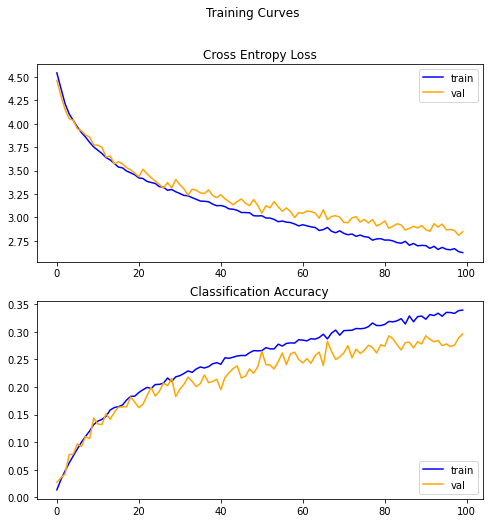


Test set evaluation metrics
10/10 [==============================] - 0s 7ms/step - loss: 2.8271 - accuracy: 0.2906
loss: 2.83
accuracy: 0.29


In [ ]:
model_report(SIMPLE_MODEL, SIMPLE_MODEL_history)

##Data augmentation στο πρώτο μοντέλο.


Παρατηρούμε οτι το μοντέλο (προηγουμένως) αποδίδει πολύ καλα στο train set αλλα όχι το ίδιο στο validation set διότι "απομνημονεύει" τα δεδομένα του train χωρίς να είναι ικανό να γενικεύσει. Απο περιπού τα 50 epoch και μετά μάλιστα παρατηρούμε πως η απόδοση δεν βελιώνεται. Θα δοκιμάσουμε να προσθέσουμε δίάφορες μεθόδους data augmentation.

To train θα γίνει με λιγότερα epoch για λογους οικονομίας χρόνου.

In [ ]:
def augment(image, label):
  
    image = tf.image.random_flip_left_right(image)

    return image, label

In [ ]:
BATCH_SIZE = 256
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

def _input_fn(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.map(augment)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object

# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1):
  start = time.time()
  history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
  end = time.time()
  print("Time to train the model : ", end-start, "seconds.")
  return(history)

Αρχικά γίνεται απλώς οριζόντιο φλιπ των εικόνων στο 50% αυτών.

In [ ]:
SIMPLE_MODEL = init_simple_model(summary = True)
SIMPLE_MODEL_history = train_model(SIMPLE_MODEL, 200, 60, 5)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

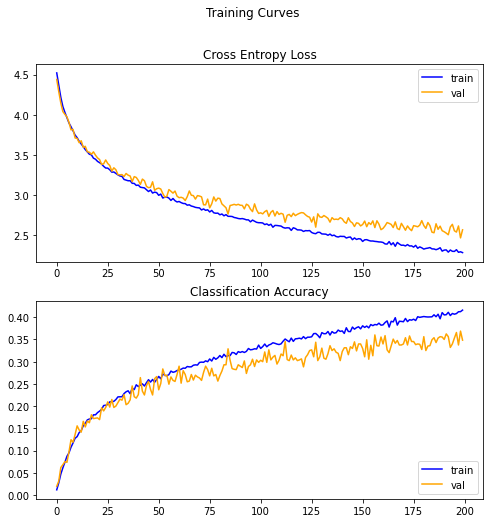


Test set evaluation metrics
10/10 [==============================] - 0s 13ms/step - loss: 2.5576 - accuracy: 0.3555
loss: 2.56
accuracy: 0.36


In [ ]:
model_report(SIMPLE_MODEL, SIMPLE_MODEL_history)

Θα δοκιμάσουμε τώρα επιπλέον να στρέφουμε τις εικόνες κατα 90 μοίρες στο 30% των περιπτώσεων μετά το φλιπ.

In [ ]:
def augment(image, label):
  
    image = tf.image.random_flip_left_right(image)

    if tf.random.uniform((), minval=0, maxval=1) < 0.3:
      image = tf.image.rot90(image)

    return image, label

In [ ]:
SIMPLE_MODEL = init_simple_model(summary = True)
SIMPLE_MODEL_history = train_model(SIMPLE_MODEL, 200, 60, 5)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)              

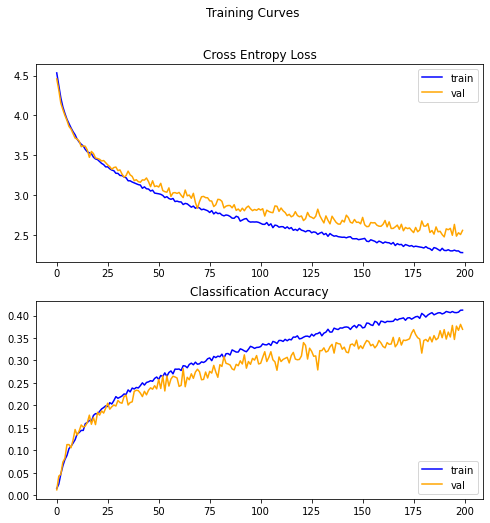


Test set evaluation metrics
10/10 [==============================] - 0s 14ms/step - loss: 2.4968 - accuracy: 0.3715
loss: 2.50
accuracy: 0.37


In [ ]:
model_report(SIMPLE_MODEL, SIMPLE_MODEL_history)

Θα δοκιμάσουμε τώρα επιπλέον αλλαγές στο contrast και στο brightness.

In [ ]:
def augment(image, label):
  
    image = tf.image.random_flip_left_right(image)

    if tf.random.uniform((), minval=0, maxval=1) < 0.3:
      image = tf.image.rot90(image)

    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.1, upper=0.2)   

    return image, label

In [ ]:
SIMPLE_MODEL = init_simple_model(summary = True)
SIMPLE_MODEL_history = train_model(SIMPLE_MODEL, 200, 60, 5)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

In [ ]:
def augment(image, label):
  
    image = tf.image.random_flip_left_right(image)

    if tf.random.uniform((), minval=0, maxval=1) < 0.3:
      image = tf.image.rot90(image)

    image = tf.image.random_brightness(image, max_delta=0.1) 

    return image, label

In [ ]:
SIMPLE_MODEL = init_simple_model(summary = True)
SIMPLE_MODEL_history = train_model(SIMPLE_MODEL, 100, 60, 5)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)              

Μετά απο αυτές τις δοκιμές καταλήγουμε στη παρακάτω συνάρτηση για το augmentation. Θα μπορούσαν να γίνουν και επιπλέον δοκιμές και με άλλες μεθόδους όπως διάφορα crop ή "τραβήγματα" στις εικόνες αλλά για λόγους οικονομίας χρόνου των συγγραφέων (σε μια πιεσμένη περίοδο πριν την εξεταστική που επίσης έχουν πέσει και όλες οι εργασίες) δεν θα γίνει στη παρούσα εργασία. Στη συνέχεια θα προχωρήσουμε σε βελτιστοποιήσεις στο μοντέλο.

In [ ]:
def augment(image, label):
  
    image = tf.image.random_flip_left_right(image)

    if tf.random.uniform((), minval=0, maxval=1) < 0.3:
      image = tf.image.rot90(image)

    return image, label

##Βελτιώνοντας το πρώτο μοντέλο

Έχοντας ασχοληθεί με το augmentation για να κάνουμε πιο αποδοτική την εκπάιδευση με λίγα δεδομένα θα προχωρήσουμε στις δοκιμές διαφορετικών μοντέλων με βάση το πρώτο.

Οι αλλαγές που γίνονται φαίνονται στον κώδικα της *init_simple_model*

In [ ]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_simple_model2(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='tanh'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
SIMPLE_MODEL2 = init_simple_model2(summary = True)
SIMPLE_MODEL_history2 = train_model(SIMPLE_MODEL2, 100, 60, 5)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_10 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)             

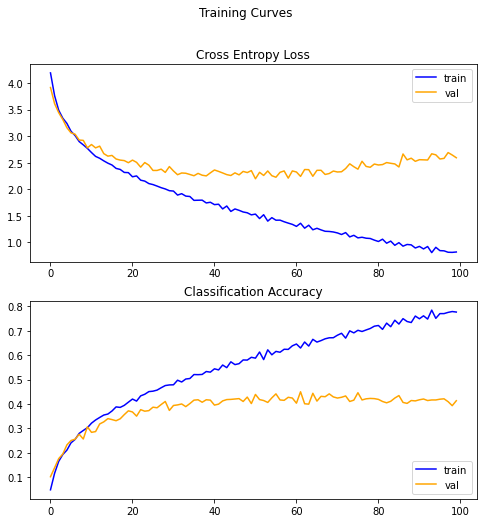


Test set evaluation metrics
10/10 [==============================] - 0s 14ms/step - loss: 2.6579 - accuracy: 0.4078
loss: 2.66
accuracy: 0.41


In [ ]:
model_report(SIMPLE_MODEL2, SIMPLE_MODEL_history2)

Παρατηρούμε ότι το train συνεχίζει να αυξάνεται, ενώ το validation μένει στάσιμο από το 5ο% και μετά, έχουμε δηλαδή φαινόμενο *overfit*


---
Στο επόμενο στάδιο προσθέτουμε ένα Dense επίπεδο


In [ ]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_simple_model3(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
SIMPLE_MODEL3 = init_simple_model3(summary = True)
SIMPLE_MODEL_history3 = train_model(SIMPLE_MODEL3, 50, 60, 5)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_11 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)             

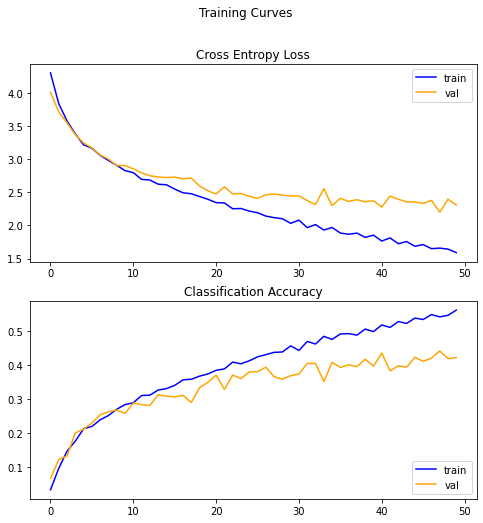


Test set evaluation metrics
10/10 [==============================] - 0s 16ms/step - loss: 2.2503 - accuracy: 0.4344
loss: 2.25
accuracy: 0.43


In [ ]:
model_report(SIMPLE_MODEL3, SIMPLE_MODEL_history3)

Πειραματιζόμαστε στη συνέχεια με τα επίπεδα και τα μεγέθη για να πετύχουμε ένα καλύτερο αποτέλεσμα.

In [ ]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_simple_model4(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='tanh'))
  model.add(layers.Dense(512, activation='tanh'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
SIMPLE_MODEL4 = init_simple_model4(summary = True)
SIMPLE_MODEL_history4 = train_model(SIMPLE_MODEL4, 100, 60, 5)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 4, 4, 128)         147584    
_________________________________________________________________
flatten_20 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 1024)            

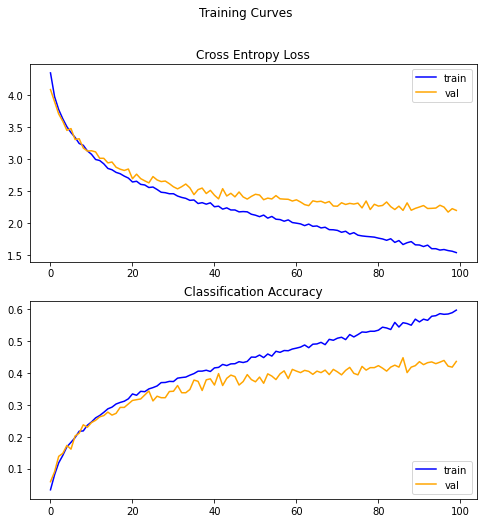


Test set evaluation metrics
10/10 [==============================] - 0s 15ms/step - loss: 2.1940 - accuracy: 0.4324
loss: 2.19
accuracy: 0.43


In [ ]:
model_report(SIMPLE_MODEL4, SIMPLE_MODEL_history4)

In [ ]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_simple_model5(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)))
 # model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='tanh'))
  model.add(layers.Dense(512, activation='tanh'))
  model.add(layers.Dense(512, activation='tanh'))
  model.add(layers.Dense(120, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
SIMPLE_MODEL5 = init_simple_model5(summary = True)
SIMPLE_MODEL_history5 = train_model(SIMPLE_MODEL5, 100, 60, 5)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 4, 4, 128)         147584    
_________________________________________________________________
flatten_21 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 1024)            

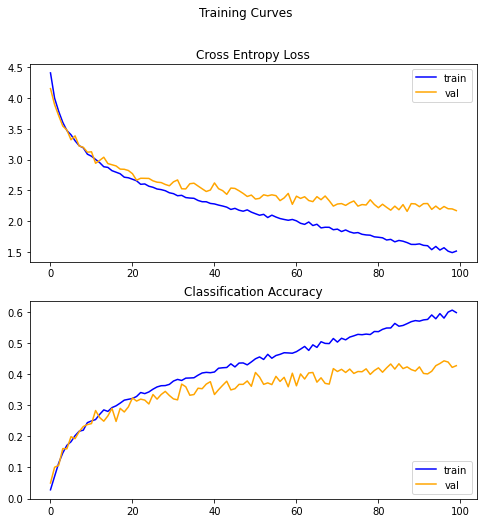


Test set evaluation metrics
10/10 [==============================] - 0s 14ms/step - loss: 2.1573 - accuracy: 0.4504
loss: 2.16
accuracy: 0.45


In [ ]:
model_report(SIMPLE_MODEL5, SIMPLE_MODEL_history5)

Γενικά παρατηρούμε 2 φαινόμενα στην εκπαίδευση:

1.    τα δεδομένα γίνονται overfit με αποτέλεσμα υψηλό accuracy στα train και χαμηλό στο evaluation
2.    Αν μειώσουμε το learning rate, δεν βελτιώνεται αισθητά η επίδοση του συστήματος

Εισάγουμε έτσι τα [Dropout layers](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/) τα οποία αποτελούν μια μέθοδο για regularization. Κατά τη διάρκεια της εκπαίδευσης, κάποιοι κόμβοι θα "νεκρωθούν".
Οσο πιο μεγάλο το dropout rate τοσο πιο "δυσκολα" ξεφευγει το train απο το evaluation, το οποίο μας οδηγεί σε μια πολυ αργή εκπαίδευση. Η τιμή του επιλέγεται 0.2-0.4.


In [ ]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_simple_model6(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='tanh'))
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(512, activation='tanh'))
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(512, activation='tanh'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
SIMPLE_MODEL6 = init_simple_model6(summary = True)
SIMPLE_MODEL_history6 = train_model(SIMPLE_MODEL6, 150, 60, 5)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 4, 4, 128)         147584    
_________________________________________________________________
flatten_24 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_65 (Dense)             (None, 1024)            

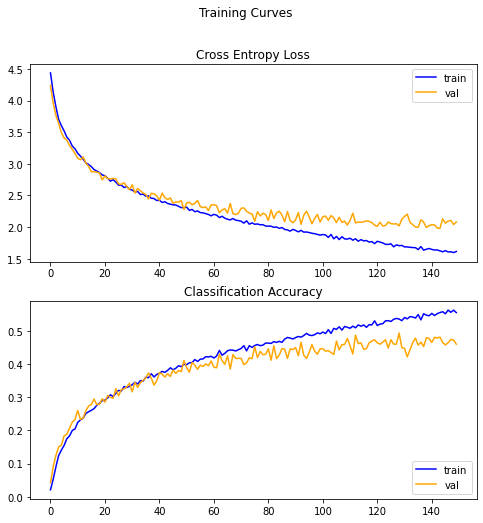


Test set evaluation metrics
10/10 [==============================] - 0s 14ms/step - loss: 2.0112 - accuracy: 0.4754
loss: 2.01
accuracy: 0.48


In [ ]:
model_report(SIMPLE_MODEL6, SIMPLE_MODEL_history6)

In [ ]:
def better_simple_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(512, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(512, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(2048, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(2048, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(120, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
MODEL6 = better_simple_model(summary = True)
MODEL_history6 = train_model(MODEL6, 100, 50, 5)

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 13, 13, 512)       1180160   
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 6, 6, 512)         0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 4, 4, 512)         2359808   
_________________________________________________________________
flatten_35 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_109 (Dense)            (None, 2048)            

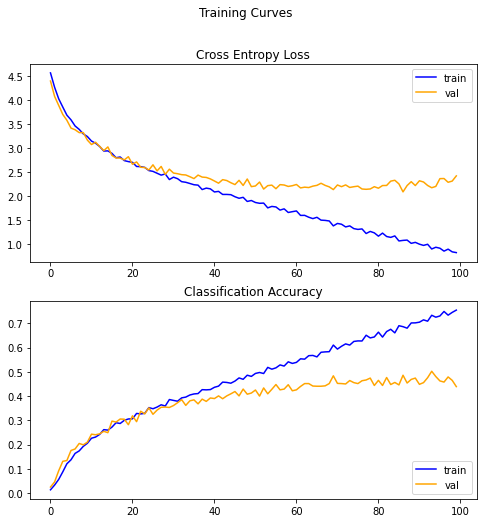


Test set evaluation metrics
10/10 [==============================] - 0s 30ms/step - loss: 2.2658 - accuracy: 0.4746
loss: 2.27
accuracy: 0.47


In [ ]:
model_report(MODEL6, MODEL_history6)

**Αργη επιπονη διαδικασια!!**



---

Δοκιμάζουμε batch normalization για ταχύτερη σύγκλιση





In [ ]:
from keras.layers import BatchNormalization
from tensorflow.python.keras.layers.normalization_v2 import BatchNormalization
def better_simple_model1(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(BatchNormalization())

  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(BatchNormalization())

  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(1024, activation='relu'))
  model.add(BatchNormalization())
  model.add(layers.Dropout(0.4))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [ ]:
MODEL = better_simple_model1(summary = True)
MODEL_history = train_model(MODEL, 100, 50, 5)

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 15, 15, 64)        256       
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 6, 6, 128)         512       
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 4, 4, 128)       

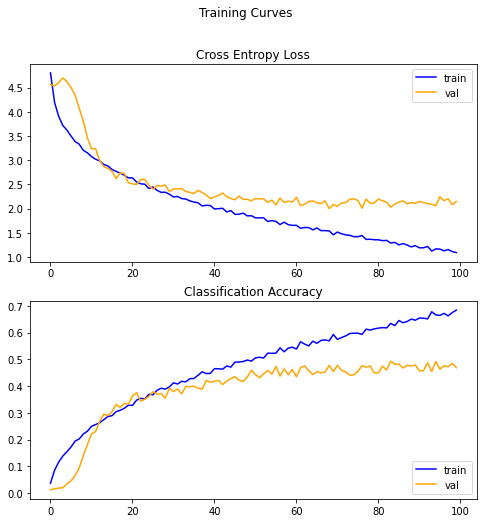


Test set evaluation metrics
10/10 [==============================] - 0s 14ms/step - loss: 2.1326 - accuracy: 0.4664
loss: 2.13
accuracy: 0.47


In [ ]:
model_report(MODEL, MODEL_history)

Eν κατακλείδι, κρατάμε ως καλύτερο το μοντέλο που φαίνεται στον παρακάτω κώδικα σύμφωνα με τις παραπάνω δοκιμές (με βάσει το loss και το accuracy στο val. set) κρατώντας τη συνάρτηση για το image augmentation που κατασταλάξαμε στη προηγούμενη ενότητα. 

Προφανώς θα μπορούσαν να γίνουν περισσότερες δοκιμές και σε ό,τι αφορά το μοντέλο αλλά και τη διαδικασία της εκπαίδευσης. Αυτές δεν έγιναν σε αυτήν την εργασία για λόγους που εξηγήθηκαν στο τέλος της προηγούμενης ενότητας για το data augmentation.

# Μεταφορά Μάθησης

In [12]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout,Flatten
from keras.applications import ResNet50, VGG16,MobileNetV2,VGG19
from keras.layers.normalization import BatchNormalization

In [13]:
def transfer_vgg16(summary):

  model = models.Sequential()
  model.add(VGG16(include_top = False,
                      input_shape = (32,32,3), classes = CLASSES_NUM, pooling = 'avg',weights = 'imagenet'
                        ))
  
  model.add(layers.Dense(1024, activation='tanh'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(1024, activation='tanh'))
  model.add(layers.Dropout(0.3))
  model.add(Dense(120, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00001,),loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [14]:
SIMPLE_MODEL7 = transfer_vgg16(summary = True)
SIMPLE_MODEL_history7 = train_model(SIMPLE_MODEL7, 70, 50, 5)

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               123000    
Total params: 16,412,600
Trainable params: 16,412,600
Non

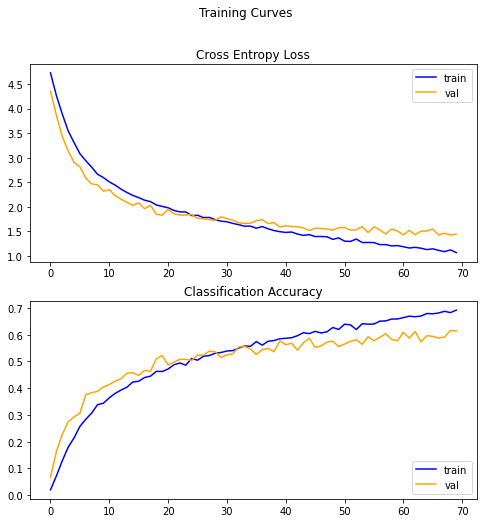


Test set evaluation metrics
10/10 [==============================] - 0s 33ms/step - loss: 1.4562 - accuracy: 0.5969
loss: 1.46
accuracy: 0.60


In [ ]:
model_report(SIMPLE_MODEL7, SIMPLE_MODEL_history7)

Για Βελτίωση του **VAL ACCURACY** [Stack](https://stackoverflow.com/questions/52356068/validation-accuracy-constant-in-keras-cnn-for-multiclass-image-classification)
ή εδώ [Research Gate](https://www.researchgate.net/post/How_to_tackle_the_problem_of_constant_val_accuracy_in_CNN_model_training)

In [ ]:
def transfer_resnet(summary):

  model = models.Sequential()
  model.add(ResNet50(include_top = False,
                     weights = 'imagenet',
                      input_shape = (32,32,3), classes = CLASSES_NUM, pooling = 'max'
                        ))
  
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(Dense(100, activation='softmax'))
  #model.layers[0].trainable = True

  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
  if summary: 
    model.summary()
  return model

In [ ]:
SIMPLE_MODEL8 = transfer_resnet(summary = True)
SIMPLE_MODEL_history8 = train_model(SIMPLE_MODEL8, 100, 60, 5)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_79 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_80 (Dense)             (None, 256)               262400    
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 100)               25700     
Total params: 25,975,012
Trainable params: 25,921,380
Non-trainable params: 53,632
____________________________________

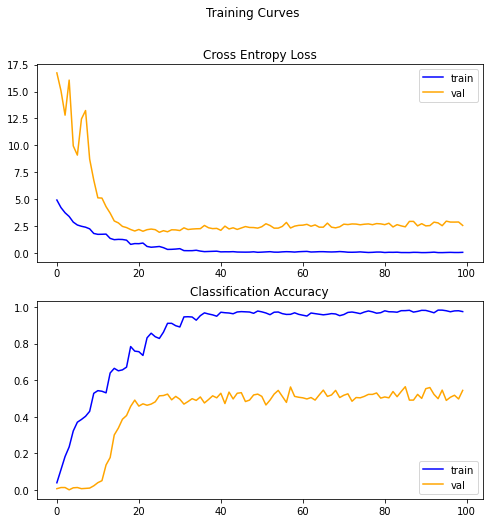


Test set evaluation metrics
10/10 [==============================] - 1s 28ms/step - loss: 2.8593 - accuracy: 0.5188
loss: 2.86
accuracy: 0.52


In [ ]:
model_report(SIMPLE_MODEL8, SIMPLE_MODEL_history8)

In [ ]:
def transfer_mobilenet(summary):

  model = models.Sequential()
  model.add(MobileNetV2(include_top = False,
                     weights = 'imagenet',
                      input_shape = (32,32,3), classes = CLASSES_NUM, pooling = 'max'
                        ))
  
  model.add(Dense(512, activation='tanh'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Dense(256, activation='tanh'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Dense(128, activation='tanh'))
  model.add(Dense(100, activation='softmax'))
  #model.layers[0].trainable = True

  model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.0001),loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
  if summary: 
    model.summary()
  return model

In [ ]:
SIMPLE_MODEL9 = transfer_mobilenet(summary = True)
SIMPLE_MODEL_history9 = train_model(SIMPLE_MODEL9, 100, 60, 5)

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_112 (Dense)            (None, 512)               655872    
_________________________________________________________________
batch_normalization_31 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_32 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)             

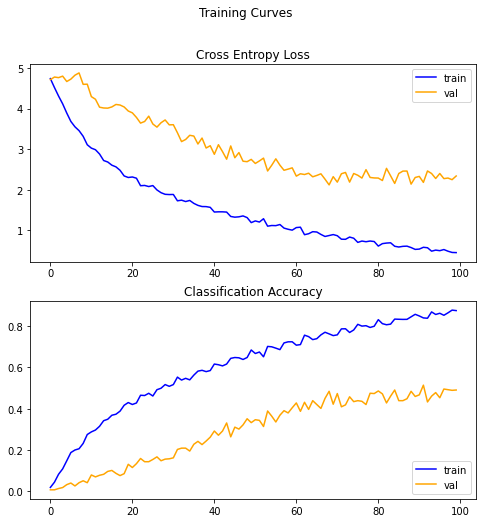


Test set evaluation metrics
10/10 [==============================] - 0s 17ms/step - loss: 2.3346 - accuracy: 0.4844
loss: 2.33
accuracy: 0.48


In [ ]:
model_report(SIMPLE_MODEL9, SIMPLE_MODEL_history9)

In [ ]:
def transfer_resnet1(summary):

  model = models.Sequential()
  model.add(ResNet50(include_top = False,
                     weights = 'imagenet',
                      input_shape = (32,32,3), classes = CLASSES_NUM, pooling = 'avg'
                        ))
  
  model.add(Dense(100, activation='softmax'))
  model.layers[0].trainable = True

  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
  if summary: 
    model.summary()
  return model

In [ ]:
SIMPLE_MODEL10 = transfer_resnet1(summary = True)
SIMPLE_MODEL_history10 = train_model(SIMPLE_MODEL10, 100, 60, 1)

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_120 (Dense)            (None, 100)               204900    
Total params: 23,792,612
Trainable params: 23,739,492
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/100
60/60 [==============================] - 10s 84ms/step - loss: 5.7779 - accuracy: 0.0253 - val_loss: 24.9207 - val_accuracy: 0.0234
Epoch 2/100
60/60 [==============================] - 4s 71ms/step - loss: 4.2089 - accuracy: 0.1058 - val_loss: 11.1949 - val_accuracy: 0.0156
Epoch 3/100
60/60 [==============================] - 4s 72ms/step - loss: 3.6480 - accuracy: 0.1916 - val_loss: 7.9957 - val_accuracy: 0.0156
Epoch 4/100
60/60 [==============================] - 4s 72ms/step - l

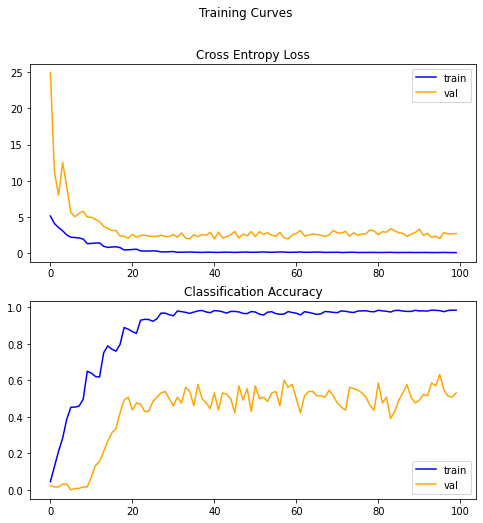


Test set evaluation metrics
10/10 [==============================] - 1s 26ms/step - loss: 2.7879 - accuracy: 0.5109
loss: 2.79
accuracy: 0.51


In [ ]:
model_report(SIMPLE_MODEL10, SIMPLE_MODEL_history10)

In [33]:
# transfer learning: VGG16 trained on ImageNet without the top layer
def init_VGG16_model(summary):
  VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(img_rows, img_cols, img_channels), include_top=False, weights='imagenet')
  
  VGG16_MODEL.trainable=True
  for layer in VGG16_MODEL.layers[:-8]:
        layer.trainable = False
  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
  prediction_layer = tf.keras.layers.Dense(120,activation='softmax')
  model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model


In [34]:
steps_per_epoch = int( np.ceil(x_train.shape[0] / BATCH_SIZE) )
VGG16_MODEL = init_VGG16_model(summary = True)
VGG16_MODEL_history = train_model(VGG16_MODEL,epochs=30,steps_per_epoch=steps_per_epoch,validation_steps=32)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_11 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_10  (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 120)               61560     
Total params: 14,776,248
Trainable params: 13,040,760
Non-trainable params: 1,735,488
_________________________________________________________________
Epoch 1/30
133/133 [==============================] - 10s 64ms/step - loss: 5.1659 - accuracy: 0.0118 - val_loss: 4.1946 - val_accuracy: 0.0424
Epoch 2/30
133/133 [==============================] - 8s 62ms/step - loss: 4.0799 - accu

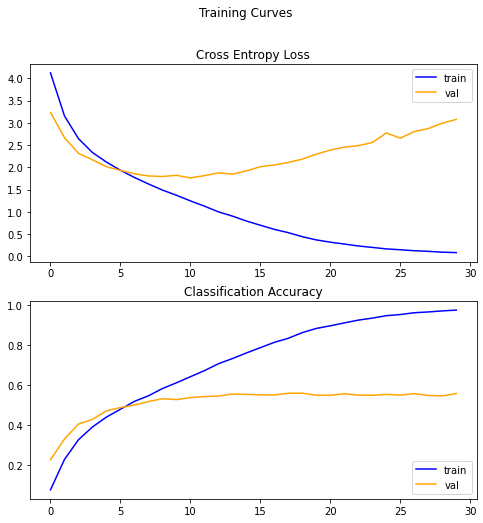


Test set evaluation metrics
30/30 [==============================] - 1s 27ms/step - loss: 3.1934 - accuracy: 0.5490
loss: 3.19
accuracy: 0.55


In [44]:
model_report(VGG16_MODEL, VGG16_MODEL_history,30)

In [41]:
# transfer learning: VGG16 trained on ImageNet without the top layer
def init_VGG16_model(summary, frozen_layers=-8, two_hidden_layers=True, learning_rate=0.00005, dropout_rate = 0.5):
  VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(img_rows, img_cols, img_channels), include_top=False, weights='imagenet')
  
  VGG16_MODEL.trainable=True
  # unfreeze conv layers
  # We do not traing unlil the last n layers
  for layer in VGG16_MODEL.layers[:frozen_layers]:
        layer.trainable = False

  dropout_layer = tf.keras.layers.Dropout(rate = dropout_rate) # Default = 0.5
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()


  # add top layer for CIFAR100 classification
  if two_hidden_layers == True:
      hidden_layer1 = tf.keras.layers.Dense(512,activation='relu')
  hidden_layer2 = tf.keras.layers.Dense(256,activation='relu')
  prediction_layer = tf.keras.layers.Dense(100,activation='softmax')
  if two_hidden_layers == True:
      model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, hidden_layer1, hidden_layer2, prediction_layer])
  else:
      model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, hidden_layer2, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

steps_per_epoch = int( np.ceil(x_train.shape[0] / BATCH_SIZE) )

Δοκιμάζουμε λοιπόν για διαφορετικές παραμέτρους και συγκρίνουμε τα αποτελέσματα.Ελέγχουμε τα αποτελέσματα αρχικά με τις default τιμές. Να σημειωθεί ότι προσθέσαμε 2 trainable hidden layers προκειμένου να εκπαιδεύσουμε το νευρωνικό πριν το prediction layer καθώς απο το έτοιμο μοντέλο αφαιρέσαμε τα τελευταία layers.

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_13  (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 100)               25700     
Total params: 15,134,372
Trainable params: 13,398,884
Non-trainable params: 1,735,488
_________________________________

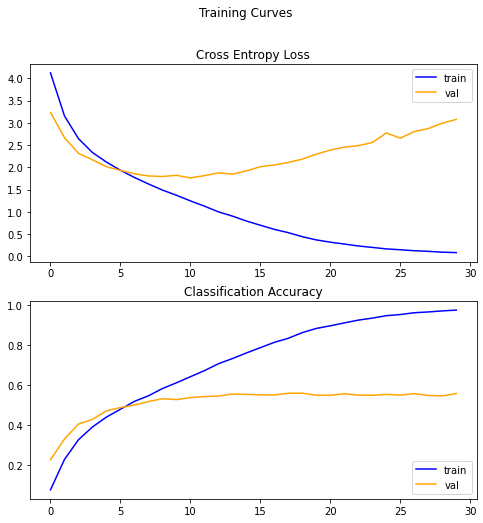


Test set evaluation metrics
10/10 [==============================] - 1s 26ms/step - loss: 3.2731 - accuracy: 0.5340
loss: 3.27
accuracy: 0.53


In [42]:
VGG16_MODEL = init_VGG16_model(summary = True)
VGG16_MODEL_history = train_model(VGG16_MODEL,epochs=30,steps_per_epoch=steps_per_epoch,validation_steps=32)
model_report(VGG16_MODEL, VGG16_MODEL_history)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_15 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_14  (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_26 (Dense)             (None, 100)               25700     
Total params: 15,134,372
Trainable params: 14,874,212
Non-trainable params: 260,160
___________________________________

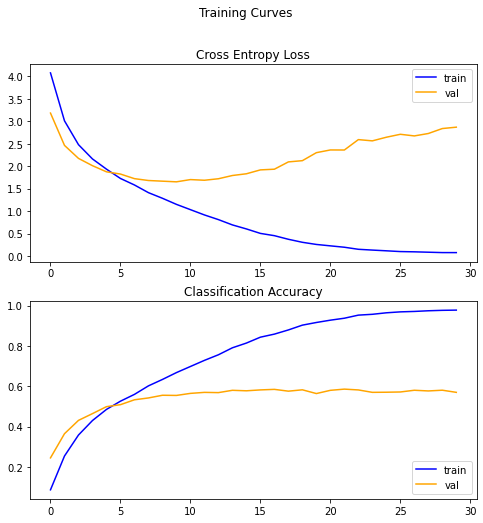


Test set evaluation metrics
10/10 [==============================] - 1s 26ms/step - loss: 2.8869 - accuracy: 0.5781
loss: 2.89
accuracy: 0.58
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_15  (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_29 (Dense)             (None, 100)  

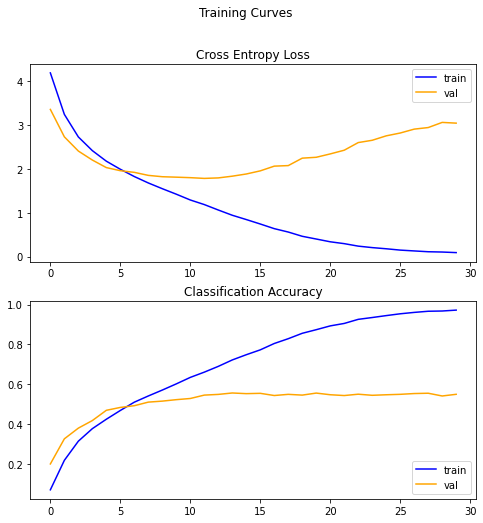


Test set evaluation metrics
10/10 [==============================] - 1s 26ms/step - loss: 3.1429 - accuracy: 0.5473
loss: 3.14
accuracy: 0.55
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_17 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_16  (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_31 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_32 (Dense)             (None, 100)  

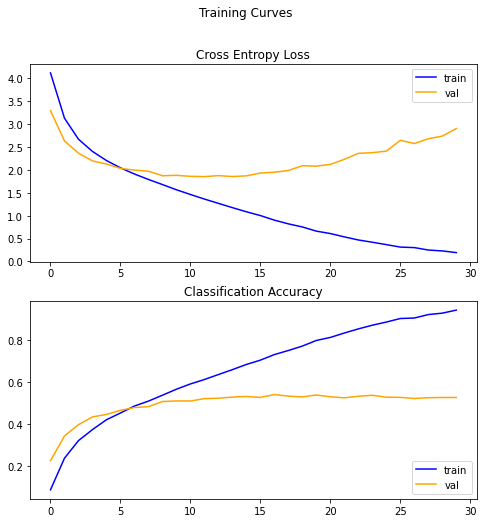


Test set evaluation metrics
10/10 [==============================] - 1s 27ms/step - loss: 2.7329 - accuracy: 0.5312
loss: 2.73
accuracy: 0.53
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_18 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_17  (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_35 (Dense)             (None, 100)  

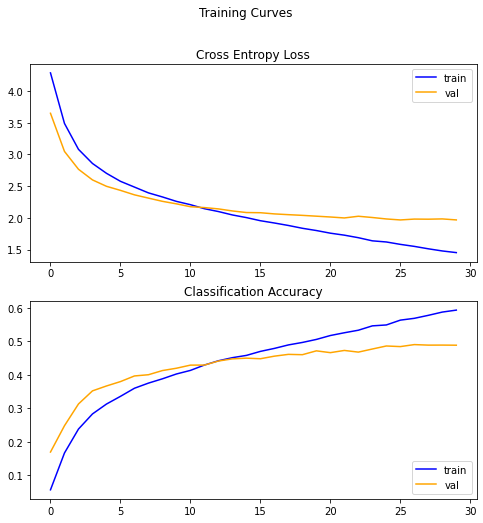


Test set evaluation metrics
10/10 [==============================] - 1s 27ms/step - loss: 1.8990 - accuracy: 0.4926
loss: 1.90
accuracy: 0.49


In [45]:
# Try for different frozen layers:
for f_l in [-12,-9,-6,-3]:
    VGG16_MODEL = init_VGG16_model(summary = True, frozen_layers=f_l)
    VGG16_MODEL_history = train_model(VGG16_MODEL,epochs=30,steps_per_epoch=steps_per_epoch,validation_steps=32)
    model_report(VGG16_MODEL, VGG16_MODEL_history)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_19 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_18  (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_38 (Dense)             (None, 100)               25700     
Total params: 15,134,372
Trainable params: 15,134,372
Non-trainable params: 0
_________________________________________

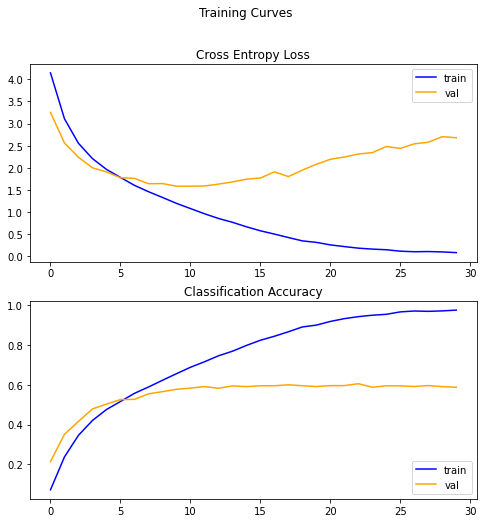


Test set evaluation metrics
30/30 [==============================] - 1s 26ms/step - loss: 2.7653 - accuracy: 0.5927
loss: 2.77
accuracy: 0.59



Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_20 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_19  (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_40 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_41 (Dense)             (None, 100

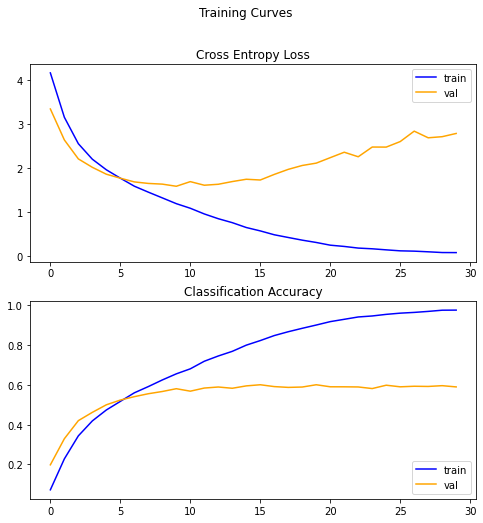


Test set evaluation metrics
30/30 [==============================] - 1s 26ms/step - loss: 2.8068 - accuracy: 0.5824
loss: 2.81
accuracy: 0.58



Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_21 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_20  (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_44 (Dense)             (None, 100

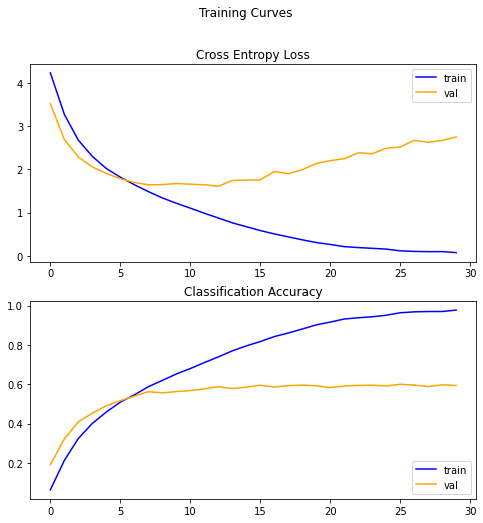


Test set evaluation metrics
30/30 [==============================] - 1s 27ms/step - loss: 2.7849 - accuracy: 0.5885
loss: 2.78
accuracy: 0.59





In [46]:
# Try for different frozen layers:
for f_l in [-21,-18,-15]:
    VGG16_MODEL = init_VGG16_model(summary = True, frozen_layers=f_l)
    VGG16_MODEL_history = train_model(VGG16_MODEL,epochs=30,steps_per_epoch=steps_per_epoch,validation_steps=32)
    model_report(VGG16_MODEL, VGG16_MODEL_history, 30)
    print('\n\n')

Απο τα παραπάνω πειράματα αποφασίζουμε να κρατήσουμε το Frozen_layers = -21 όπου απόδοση του μοντέλου ήταν στο 59%.
Τωρα δοκιμάζουμε διαφορετικές τιμές του dropout_rate

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_23 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_22  (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_50 (Dense)             (None, 100)               25700     
Total params: 15,134,372
Trainable params: 15,134,372
Non-trainable params: 0
_________________________________________

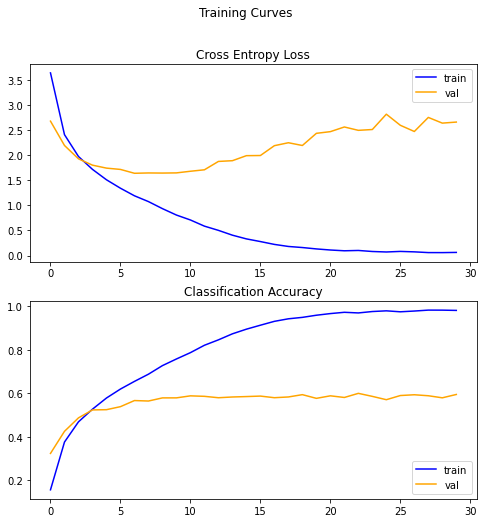


Test set evaluation metrics
30/30 [==============================] - 1s 26ms/step - loss: 2.6764 - accuracy: 0.5948
loss: 2.68
accuracy: 0.59



Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_24 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_23  (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_52 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_53 (Dense)             (None, 100

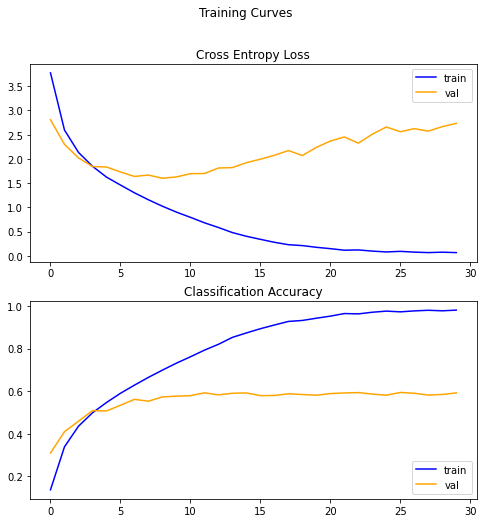


Test set evaluation metrics
30/30 [==============================] - 1s 27ms/step - loss: 2.7484 - accuracy: 0.5896
loss: 2.75
accuracy: 0.59



Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_25 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_24  (None, 512)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_55 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_56 (Dense)             (None, 100

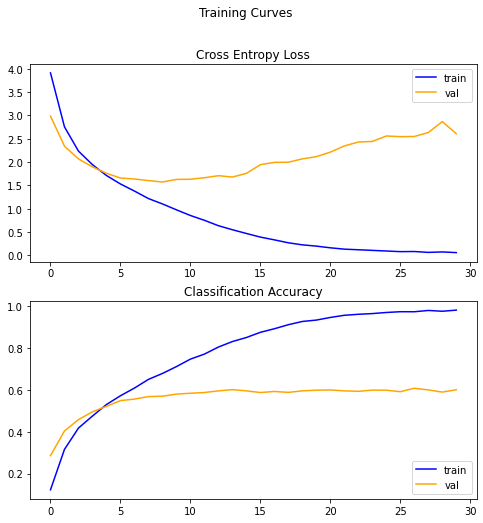


Test set evaluation metrics
30/30 [==============================] - 1s 27ms/step - loss: 2.7002 - accuracy: 0.5926
loss: 2.70
accuracy: 0.59



Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_26 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_25  (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_58 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_59 (Dense)             (None, 100

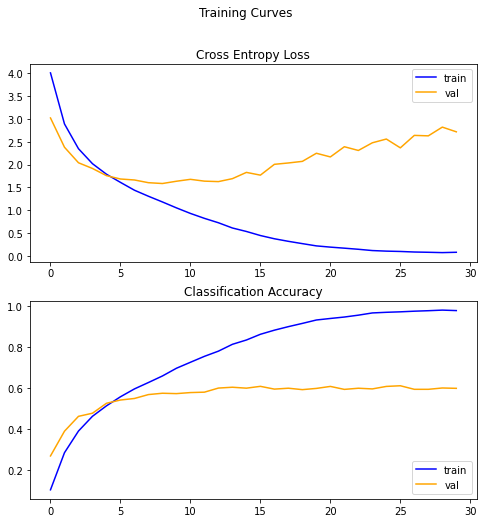


Test set evaluation metrics
30/30 [==============================] - 1s 27ms/step - loss: 2.8058 - accuracy: 0.5882
loss: 2.81
accuracy: 0.59



Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_27 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_26  (None, 512)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_61 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_62 (Dense)             (None, 100

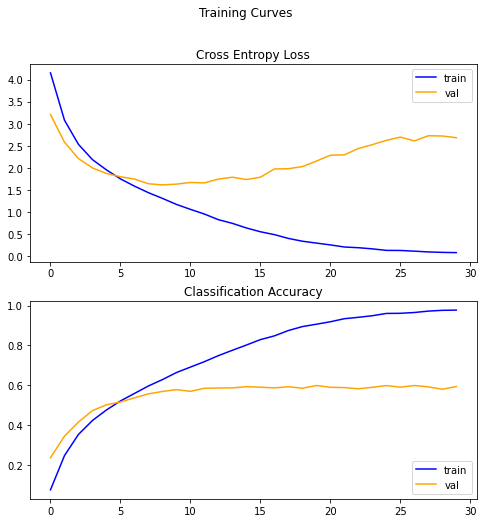


Test set evaluation metrics
30/30 [==============================] - 1s 27ms/step - loss: 2.6846 - accuracy: 0.5872
loss: 2.68
accuracy: 0.59





In [48]:
for d_r in [0.1,0.2,0.3,0.4,0.5]:
    VGG16_MODEL = init_VGG16_model(summary = True, frozen_layers=-21,dropout_rate=d_r)
    VGG16_MODEL_history = train_model(VGG16_MODEL,epochs=30,steps_per_epoch=steps_per_epoch,validation_steps=32)
    model_report(VGG16_MODEL, VGG16_MODEL_history, 30)
    print('\n\n')

Επομένως αποφασίζουμε να κρατήσουμε το Dropout στο 0.3

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_28 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_27  (None, 512)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_64 (Dense)             (None, 100)               25700     
Total params: 14,871,716
Trainable params: 14,871,716
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
133/133 [==============================] - 14s 99ms/step - loss: 4.2158 - accuracy: 0.0746 - val

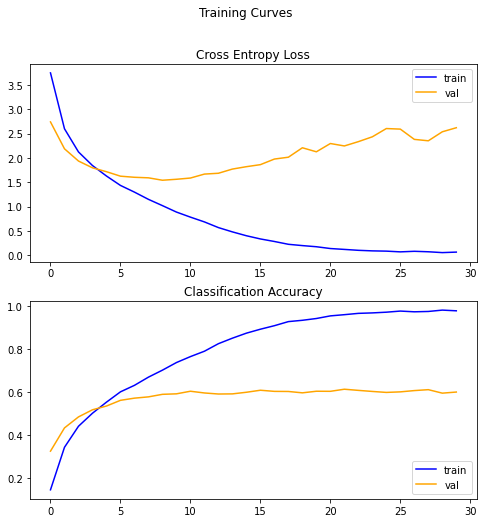


Test set evaluation metrics
10/10 [==============================] - 1s 26ms/step - loss: 2.6353 - accuracy: 0.5953
loss: 2.64
accuracy: 0.60


In [49]:
# Delete 1st hidden layer
VGG16_MODEL = init_VGG16_model(summary = True, frozen_layers=-21,dropout_rate=0.3,two_hidden_layers=False)
VGG16_MODEL_history = train_model(VGG16_MODEL,epochs=30,steps_per_epoch=steps_per_epoch,validation_steps=32)
model_report(VGG16_MODEL, VGG16_MODEL_history)

In [54]:
# transfer learning: VGG16 trained on ImageNet without the top layer
def init_VGG16_model(summary, frozen_layers=-8, two_hidden_layers=True, learning_rate=0.00005, dropout_rate = 0.5):
  VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(img_rows, img_cols, img_channels), include_top=False, weights='imagenet')
  
  VGG16_MODEL.trainable=True
  # unfreeze conv layers
  # We do not traing unlil the last n layers
  for layer in VGG16_MODEL.layers[:frozen_layers]:
        layer.trainable = False
    
   

  dropout_layer = tf.keras.layers.Dropout(rate = dropout_rate) # Default = 0.5
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()


  # add top layer for CIFAR100 classification
  if two_hidden_layers == True:
      hidden_layer1 = tf.keras.layers.Dense(512,activation='relu')
  hidden_layer2 = tf.keras.layers.Dense(256,activation='relu')
  prediction_layer = tf.keras.layers.Dense(100,activation='softmax')
  if two_hidden_layers == True:
      model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, hidden_layer1, hidden_layer2, prediction_layer])
  else:
      model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, hidden_layer2, prediction_layer])
  model.compile(optimizer=tf.optimizers.SGD(learning_rate=learning_rate), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

steps_per_epoch = int( np.ceil(x_train.shape[0] / BATCH_SIZE) )

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_34 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_33  (None, 512)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_76 (Dense)             (None, 100)               25700     
Total params: 14,871,716
Trainable params: 14,871,716
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
133/133 [==============================] - 14s 97ms/step - loss: 4.7962 - accuracy: 0.0123 - val

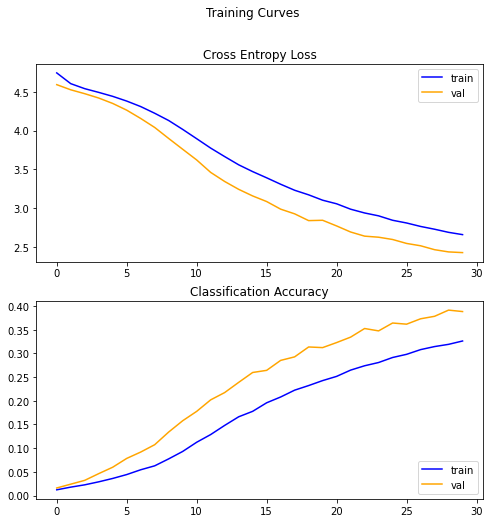


Test set evaluation metrics
30/30 [==============================] - 1s 26ms/step - loss: 2.4214 - accuracy: 0.3828
loss: 2.42
accuracy: 0.38



Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_35 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_34  (None, 512)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_78 (Dense)             (None, 100)               25700     
Total params: 14,871,716
Trainable params: 14,871,716
Non-trainable params: 0
___________________________

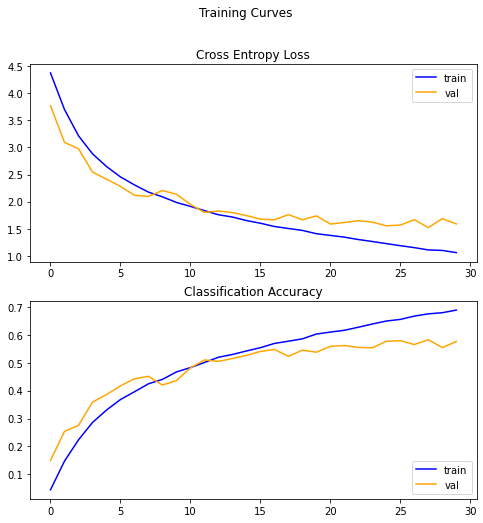


Test set evaluation metrics
30/30 [==============================] - 1s 27ms/step - loss: 1.5612 - accuracy: 0.5773
loss: 1.56
accuracy: 0.58



Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_36 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_35  (None, 512)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_80 (Dense)             (None, 100)               25700     
Total params: 14,871,716
Trainable params: 14,871,716
Non-trainable params: 0
___________________________

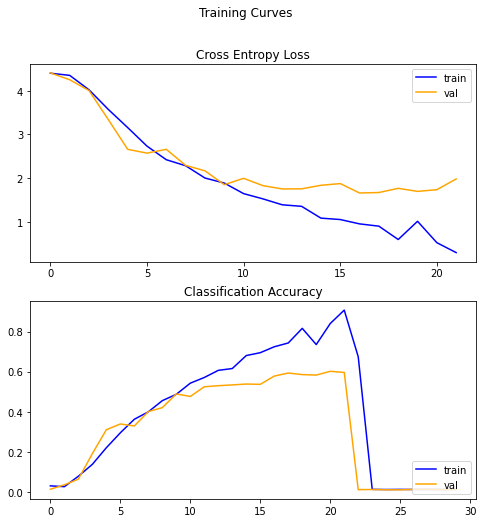


Test set evaluation metrics
30/30 [==============================] - 1s 25ms/step - loss: nan - accuracy: 0.0125
loss: nan
accuracy: 0.01





In [58]:
for learning_rate in [0.0005,0.005,0.1]:
    # Delete 1st hidden layer
    VGG16_MODEL = init_VGG16_model(summary = True, learning_rate=learning_rate, frozen_layers=-21,dropout_rate=0.3,two_hidden_layers=False)
    VGG16_MODEL_history = train_model(VGG16_MODEL,epochs=30,steps_per_epoch=steps_per_epoch,validation_steps=32)
    model_report(VGG16_MODEL, VGG16_MODEL_history, 30)
    print('\n\n')

Επομένως αποφασίζουμε να κρατήσουμε το Learning rate στο 0.005

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_37 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_36  (None, 512)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_82 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_83 (Dense)             (None, 100)               25700     
Total params: 15,134,372
Trainable params: 15,134,372
Non-trainable params: 0
_________________________________________

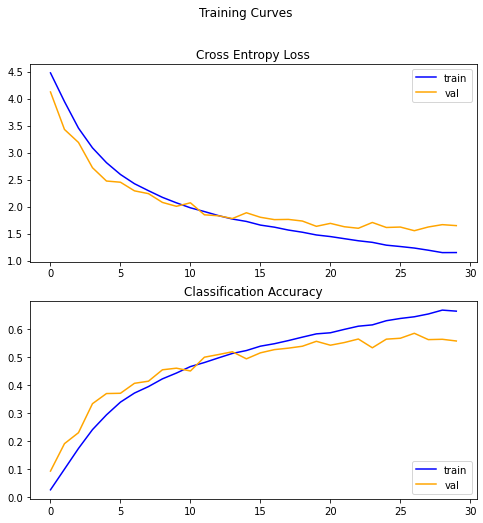


Test set evaluation metrics
30/30 [==============================] - 1s 27ms/step - loss: 1.6188 - accuracy: 0.5621
loss: 1.62
accuracy: 0.56



Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_38 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d_37  (None, 512)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_85 (Dense)             (None, 100)               25700     
Total params: 14,871,716
Trainable params: 14,871,716
Non-trainable params: 0
___________________________

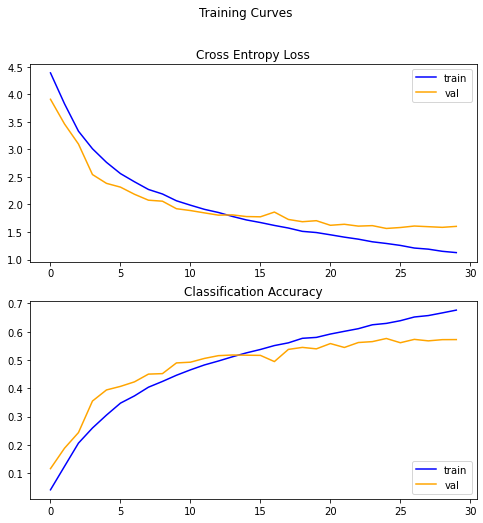


Test set evaluation metrics
30/30 [==============================] - 1s 27ms/step - loss: 1.5955 - accuracy: 0.5656
loss: 1.60
accuracy: 0.57


In [62]:

VGG16_MODEL = init_VGG16_model(summary = True, learning_rate=0.005, frozen_layers=-21,dropout_rate=0.3 ,two_hidden_layers=True)
VGG16_MODEL_history = train_model(VGG16_MODEL,epochs=30,steps_per_epoch=steps_per_epoch,validation_steps=32)
model_report(VGG16_MODEL, VGG16_MODEL_history, 30)
print('\n\n')



VGG16_MODEL = init_VGG16_model(summary = True, learning_rate=0.005, frozen_layers=-21,dropout_rate=0.3 ,two_hidden_layers=False)
VGG16_MODEL_history = train_model(VGG16_MODEL,epochs=30,steps_per_epoch=steps_per_epoch,validation_steps=32)
model_report(VGG16_MODEL, VGG16_MODEL_history, 30)

Άρα κρατάμε το μοντέλο 256->100 με παραμέτρους Frozen_layers = -21 ,Dropout=0.3,Learning rate=0.005 και μας έδωσε accuracy 57%.